# Advent of Code 2019
https://adventofcode.com/2019

## Day 1: The Tyranny of the Rocket Equation

In [1]:
with open('input1.txt', 'rt') as infile:
    total = sum(int(l) // 3 - 2 for l in infile)

print('Part 1:', total)

Part 1: 3401852


With fuel as added mass:

In [2]:
def total_fuel(mass):
    total = 0
    while mass:
        mass = max(mass // 3 - 2, 0)
        total += mass
    return total

In [3]:
assert total_fuel(14) == 2
assert total_fuel(1969) == 966
assert total_fuel(100756) == 50346

In [4]:
with open('input1.txt', 'rt') as infile:
    total = sum(total_fuel(int(l)) for l in infile)
print('Part 2:', total)

Part 2: 5099916


## Day 2: 1202 Program Alarm

In [5]:
def add(memory, r1, r2, r3):
    memory[r3] = memory[r1] + memory[r2]

def mul(memory, r1, r2, r3):
    memory[r3] = memory[r1] * memory[r2]

def halt(*a):
    raise StopIteration
    
dispatch = {1: add, 2:mul, 99: halt}
def run(program_memory):
    i_ptr = 0
    while i_ptr < len(program_memory):
        opcode = program_memory[i_ptr]
        try:
            dispatch[opcode](program_memory, *program_memory[i_ptr + 1:i_ptr + 4])
        except StopIteration:
            break
        i_ptr += 4
    return program_memory

In [6]:
assert run([1,9,10,3,2,3,11,0,99,30,40,50]) == [3500,9,10,70,2,3,11,0,99,30,40,50]

In [7]:
assert run([1,0,0,0,99]) == [2,0,0,0,99]

In [8]:
assert run([2,3,0,3,99]) == [2,3,0,6,99]

In [9]:
assert run([2,4,4,5,99,0]) == [2,4,4,5,99,9801]

In [10]:
assert run([1,1,1,4,99,5,6,0,99]) == [30,1,1,4,2,5,6,0,99]

In [11]:
with open('input2.txt', 'rt') as infile:
    codes = [int(c) for c in infile.readline().split(',')]

In [12]:
codes[1] = 12
codes[2] = 2
print('Part 1: ', run(codes)[0])

Part 1:  4138687


In [13]:
with open('input2.txt', 'rt') as infile:
    original_codes = [int(c) for c in infile.readline().split(',')]

for noun in range(0, 100):
    for verb in range(0, 100):
        codes = original_codes.copy()
        codes[1] = noun
        codes[2] = verb
        if run(codes)[0] == 19690720:
            print('Part 2:', 100 * noun + verb)

Part 2: 6635


## Day 3: Crossed Wires

In [14]:
def solve(line1, line2):
    wire1 = make_paths(line1.split(','))
    wire2 = make_paths(line2.split(','))
    return min(abs(pt[0]) + abs(pt[1]) for pt in find_intersections(wire1, wire2))

def find_intersections(wire1, wire2):
    for seg1 in wire1:
        for seg2 in wire2:
            pt = intersects(seg1, seg2)
            if pt is not None and pt != (0, 0):
                yield pt

def intersects(seg1, seg2):
    direc1, fixed1, b0_1, b1_1, dist1 = seg1
    direc2, fixed2, b0_2, b1_2, dist2 = seg2
    if fixed1 == 0 and fixed2 == 0:
        return

    if (direc1 in ('L', 'R') and direc2 in ('L', 'R')) or (direc1 in ('U', 'D') and direc2 in ('U', 'D')):
        if fixed1 == fixed2:
            print('here!')
    elif fixed1 >= b0_2 and fixed1 <= b1_2 and fixed2 >= b0_1 and fixed2 <= b1_1:
        off1 = fixed1 - b0_2 if direc2 in ('U', 'R') else b1_2 - fixed1
        off2 = fixed2 - b0_1 if direc1 in ('U', 'R') else b1_1 - fixed2
        if direc1 in ('L', 'R'):
            return fixed2, fixed1, dist1 + dist2 + off1 + off2
        elif direc2 in ('L', 'R'):
            return fixed1, fixed2, dist1 + dist2 + off1 + off2
    
def make_paths(moves):
    cur_x = 0
    cur_y = 0
    paths = []
    total = 0
    for step in moves:
        direc = step[0]
        dist = int(step[1:])
        next_x = cur_x
        next_y = cur_y
        if direc == 'L':
            next_x -= dist
            paths.append((direc, cur_y, min(cur_x, next_x), max(cur_x, next_x), total))
        elif direc == 'R':
            next_x += dist
            paths.append((direc, cur_y, min(cur_x, next_x), max(cur_x, next_x), total))
        elif direc == 'U':
            next_y += dist
            paths.append((direc, cur_x, min(cur_y, next_y), max(cur_y, next_y), total))
        elif direc == 'D':
            next_y -= dist
            paths.append((direc, cur_x, min(cur_y, next_y), max(cur_y, next_y), total))
        total += dist
        cur_x, cur_y = next_x, next_y
    return paths

In [15]:
assert solve('R8,U5,L5,D3', 'U7,R6,D4,L4') == 6

In [16]:
assert solve('R75,D30,R83,U83,L12,D49,R71,U7,L72', 'U62,R66,U55,R34,D71,R55,D58,R83') == 159

In [17]:
assert solve('R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51', 'U98,R91,D20,R16,D67,R40,U7,R15,U6,R7') == 135

In [18]:
with open('input3.txt', 'rt') as infile:
    print('Part1:', solve(infile.readline(), infile.readline()))

Part1: 245


Now part2:

In [19]:
def solve2(line1, line2):
    wire1 = make_paths(line1.split(','))
    wire2 = make_paths(line2.split(','))
    return min(pt[2] for pt in find_intersections(wire1, wire2))

In [20]:
assert solve2('R8,U5,L5,D3', 'U7,R6,D4,L4') == 30

In [21]:
assert solve2('R75,D30,R83,U83,L12,D49,R71,U7,L72', 'U62,R66,U55,R34,D71,R55,D58,R83') == 610

In [22]:
assert solve2('R98,U47,R26,D63,R33,U87,L62,D20,R33,U53,R51', 'U98,R91,D20,R16,D67,R40,U7,R15,U6,R7') == 410

In [23]:
with open('input3.txt', 'rt') as infile:
    print('Part 2:', solve2(infile.readline(), infile.readline()))

Part 2: 48262


## Day 4: Secure Container

In [24]:
def is_valid(pwd):
    has_pair = False
    for i,j in zip(pwd[:-1], pwd[1:]):
        if j<i:
            return False
        has_pair |= (j == i)
    return has_pair

In [25]:
assert is_valid('111111')

In [26]:
assert not is_valid('223450')

In [27]:
assert not is_valid('123789')

In [28]:
start = 134564
end = 585159
print('Part 1:', sum(is_valid(str(i)) for i in range(start, end + 1)))

Part 1: 1929


In [29]:
def is_valid2(pwd):
    has_pair = False
    for i in range(len(pwd) - 1):
        if pwd[i + 1]<pwd[i]:
            return False
        test_val = (pwd[i] == pwd[i + 1])
        if i > 0:
            test_val &= pwd[i - 1] != pwd[i]
        if i < len(pwd) - 2:
            test_val &= (pwd[i + 1] != pwd[i + 2])
        has_pair |= test_val
    return has_pair

In [30]:
assert is_valid2('112233')

In [31]:
assert not is_valid2('123444')

In [32]:
assert is_valid2('111122')

In [33]:
print('Part 2:', sum(is_valid2(str(i)) for i in range(start, end + 1)))

Part 2: 1306


# Day 5: Sunny with a Chance of Asteroids

In [34]:
from intcode import Computer

In [35]:
c = Computer([1002,4,3,4,33])
c.run()
assert c.memory[4] == 99

In [36]:
c = Computer([1101,100,-1,4,0])
c.run()
assert c.memory[4] == 99

In [37]:
c = Computer([3,0,4,0,99])
c.run([5])
assert c.output[0] == 5

In [38]:
c = Computer.fromfile('input5.txt')
c.run([1])
print('Part 1:', c.output)

Part 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 7259358]


Part 2:

In [39]:
for indata, outdata in zip([1, 8, 9], [0, 1, 0]):
    c = Computer([3,9,8,9,10,9,4,9,99,-1,8])
    c.run([indata])
    assert c.output == [outdata]

In [40]:
for indata, outdata in zip([1, 8, 9], [1, 0, 0]):
    c = Computer([3,9,7,9,10,9,4,9,99,-1,8])
    c.run([indata])
    assert c.output == [outdata]

In [41]:
for indata, outdata in zip([1, 8, 9], [0, 1, 0]):
    c = Computer([3,3,1108,-1,8,3,4,3,99])
    c.run([indata])
    assert c.output == [outdata]

In [42]:
for indata, outdata in zip([1, 8, 9], [1, 0, 0]):
    c = Computer([3,3,1107,-1,8,3,4,3,99])
    c.run([indata])
    assert c.output == [outdata]

In [43]:
for indata, outdata in zip([0, 100], [0, 1]):
    c = Computer([3,12,6,12,15,1,13,14,13,4,13,99,-1,0,1,9])
    c.run([indata])
    assert c.output == [outdata]

In [44]:
for indata, outdata in zip([0, 100], [0, 1]):
    c = Computer([3,3,1105,-1,9,1101,0,0,12,4,12,99,1])
    c.run([indata])
    assert c.output == [outdata]

In [45]:
for indata, outdata in zip([7, 8, 9], [999, 1000, 1001]):
    c = Computer([3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,
                  1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,
                  999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99])
    c.run([indata])
    assert c.output == [outdata]

In [46]:
c = Computer.fromfile('input5.txt')
c.run([5])
print('Part 2:', c.output[0])

Part 2: 11826654


## Day 6: Universal Orbit Map

In [47]:
def get_orbits(src):
    orbits = {}
    for line in src:
        center, sat = line.strip().split(')')
        orbits[sat] = center
    return orbits


def count_orbits(orbits, body):
    total = 0
    while (parent := orbits.get(body)) is not None:
        total += 1
        body = parent
    return total
    

def count_total_orbits(orbits):
    total = 0
    for body in orbits:
        total += count_orbits(orbits, body)
    return total

In [48]:
from io import StringIO
o = get_orbits(StringIO('COM)B\nB)C\nC)D\nD)E\nE)F\nB)G\nG)H\nD)I\nE)J\nJ)K\nK)L'))

assert count_orbits(o, 'D') == 3
assert count_orbits(o, 'L') == 7
assert count_orbits(o, 'COM') == 0
assert count_total_orbits(o) == 42

In [49]:
with open('input6.txt', 'rt') as infile:
    orbits = get_orbits(infile)

In [50]:
print('Part 1:', count_total_orbits(orbits))

Part 1: 358244


In [51]:
def find_path(orbits):
    # Find the path for Santa to root node
    path = ['SAN']
    while path[-1] in orbits:
        path.append(orbits[path[-1]])
    
    # Now find our path to root until we hit something in the first path
    our_path = ['YOU']
    while our_path[-1] in orbits and our_path[-1] not in path:
        our_path.append(orbits[our_path[-1]])
    
    # Find index of intersection in first path for slicing
    ind = path.index(our_path[-1])

    # Start slices at 1 to eliminate us and Santa from path
    return our_path[1:] + path[ind - 1:0:-1]

def transfers(path):
    return len(path) - 1

In [52]:
o = get_orbits(StringIO('COM)B\nB)C\nC)D\nD)E\nE)F\nB)G\nG)H\nD)I\nE)J\nJ)K\nK)L\nK)YOU\nI)SAN'))

In [53]:
assert transfers(find_path(o)) == 4

In [54]:
print('Part 2:', transfers(find_path(orbits)))

Part 2: 517


## Day 7: Amplification Circuit

In [55]:
import itertools

def find_max_thrust(code):
    max_thrust = 0
    for phases in itertools.permutations(range(5), 5):
        val = 0
        for phase in phases:
            c = Computer(code)
            c.run([phase, val])
            val = c.output[0]
        if c.output[0] > max_thrust:
            max_thrust = c.output[0]
            best = phases
    return best, max_thrust

In [56]:
assert find_max_thrust([3,15,3,16,1002,16,10,16,1,16,15,15,4,15,99,0,0]) == ((4, 3, 2, 1, 0), 43210)

In [57]:
assert (find_max_thrust([3,23,3,24,1002,24,10,24,1002,23,-1,23,101,5,23,23,1,24,23,23,4,23,99,0,0])
        == ((0, 1, 2, 3, 4), 54321))

In [58]:
assert (find_max_thrust([3,31,3,32,1002,32,10,32,1001,31,-2,31,1007,31,0,33,1002,33,7,33,1,33,31,31,1,32,31,31,4,31,99,0,0,0])
        == ((1, 0, 4, 3, 2), 65210))

In [59]:
with open('input7.txt', 'rt') as infile:
    code = [int(c) for c in infile.readline().split(',')]

In [60]:
_, mt = find_max_thrust(code)
print('Part 1:', mt)

Part 1: 225056


In [61]:
def find_max_thrust_feedback(code):
    max_thrust = 0
    for phases in itertools.permutations(range(5, 10), 5):
        amps = [Computer(code, id=i) for i in range(5)]
        for i, (phase, amp) in enumerate(zip(phases, amps)):
            amps[i-1].connect_sink(amp)
            amp.send_input([phase])

        amps[0].send_input([0])

        while any(amp.running for amp in amps):
            for amp in amps:
                amp.run()

        if amps[-1].output[0] > max_thrust:
            max_thrust = amps[-1].output[0]
            best = phases
    return best, max_thrust

In [62]:
assert (find_max_thrust_feedback([3,26,1001,26,-4,26,3,27,1002,27,2,27,1,27,26,27,4,27,1001,28,-1,28,1005,28,6,99,0,0,5])
        == ((9, 8, 7, 6, 5), 139629729))

In [63]:
assert (find_max_thrust_feedback([3,52,1001,52,-5,52,3,53,1,52,56,54,1007,54,5,55,1005,55,26,1001,54,
                                  -5,54,1105,1,12,1,53,54,53,1008,54,0,55,1001,55,1,55,2,53,55,53,4,
                                  53,1001,56,-1,56,1005,56,6,99,0,0,0,0,10])
        == ((9, 7, 8, 5, 6), 18216))

In [64]:
_, mt = find_max_thrust_feedback(code)
print('Part 2:', mt)

Part 2: 14260332


## Day 8: Space Image Format

In [65]:
with open('input8.txt', 'rt') as infile:
    image_data = infile.read().strip()
    
layer_shape = (6, 25)
BLACK = 0
WHITE = 1
TRANSPARENT = 2

In [66]:
import numpy as np

def chunk_iter(seq, size):
    ind = 0
    while ind < len(seq):
        yield seq[ind:ind + size]
        ind += size

def iter_layers(data, shape):
    rows, cols = shape
    for layer in chunk_iter(data, rows * cols):
        yield np.array([int(c) for c in layer]).reshape(*shape)

In [67]:
min_zero = layer_shape[0] * layer_shape[1]
for layer in iter_layers(image_data, layer_shape):
    num_zeros = (layer == 0).sum()
    if num_zeros < min_zero:
        min_zero = num_zeros
        min_layer = layer

In [68]:
print('Part 1:', (min_layer == 2).sum() * (min_layer == 1).sum())

Part 1: 2064


In [69]:
image = np.full(layer_shape, TRANSPARENT, dtype=np.int)
for layer in iter_layers(image_data, layer_shape):
    mask = image == TRANSPARENT
    image[mask] = layer[mask]

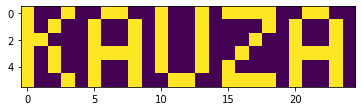

In [70]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [71]:
render = '\n'.join(''.join('#' if item == WHITE else ' ' for item in row) for row in image)
print('Part 2:', render, sep='\n')

Part 2:
#  #  ##  #  # ####  ##  
# #  #  # #  #    # #  # 
##   #  # #  #   #  #  # 
# #  #### #  #  #   #### 
# #  #  # #  # #    #  # 
#  # #  #  ##  #### #  # 


## Day 9: Sensor Boost

In [72]:
from intcode import Computer

In [73]:
start_code = [109,1,204,-1,1001,100,1,100,1008,100,16,101,1006,101,0,99]
c = Computer(start_code)
c.run()
assert c.output == start_code

In [74]:
c = Computer([1102,34915192,34915192,7,4,7,99,0])
c.run()
assert len(str(c.output[0])) == 16

In [75]:
c = Computer([104,1125899906842624,99])
c.run()
assert c.output == [1125899906842624]

In [76]:
c = Computer.fromfile('input9.txt')
c.run([1])
print('Part 1:', c.output)

Part 1: [3839402290]


In [77]:
c = Computer.fromfile('input9.txt')
c.run([2])
print('Part 2:', c.output)

Part 2: [35734]


## Day 10: Monitoring Station

In [78]:
def read_asteroids(fobj):
    return [(col, row)
            for row, line in enumerate(fobj)
            for col, c in enumerate(line.strip())
            if c == '#']

In [79]:
from functools import lru_cache

def gcd(x, y):
    while y != 0:
        x, y = y, x % y
    return x

def get_direction(x, y):
    div = gcd(abs(x), abs(y))
    return x // div, y // div

def count_options(loc, asteroids):
    return len({get_direction(a[0] - loc[0], a[1] - loc[1]) for a in asteroids if a != loc})

def find_max_options(asteroids):
    return max((count_options(location, asteroids), location) for location in asteroids)

In [80]:
from io import StringIO
f = StringIO('.#..#\n.....\n#####\n....#\n...##')
t = read_asteroids(f)

In [81]:
assert [count_options(p, t) for p in t] == [7, 7, 6, 7, 7, 7, 5, 7, 8, 7]

In [82]:
assert find_max_options(t) == (8, (3, 4))

In [83]:
f = StringIO('''......#.#.
#..#.#....
..#######.
.#.#.###..
.#..#.....
..#....#.#
#..#....#.
.##.#..###
##...#..#.
.#....####''')
t = read_asteroids(f)
assert find_max_options(t) == (33, (5, 8))

In [84]:
f = StringIO('''#.#...#.#.
.###....#.
.#....#...
##.#.#.#.#
....#.#.#.
.##..###.#
..#...##..
..##....##
......#...
.####.###.''')
t = read_asteroids(f)
assert find_max_options(t) == (35, (1, 2))

In [85]:
f = StringIO('''.#..#..###
####.###.#
....###.#.
..###.##.#
##.##.#.#.
....###..#
..#.#..#.#
#..#.#.###
.##...##.#
.....#.#..''')
t = read_asteroids(f)
assert find_max_options(t) == (41, (6, 3))

In [86]:
f = StringIO('''.#..##.###...#######
##.############..##.
.#.######.########.#
.###.#######.####.#.
#####.##.#.##.###.##
..#####..#.#########
####################
#.####....###.#.#.##
##.#################
#####.##.###..####..
..######..##.#######
####.##.####...##..#
.#####..#.######.###
##...#.##########...
#.##########.#######
.####.#.###.###.#.##
....##.##.###..#####
.#.#.###########.###
#.#.#.#####.####.###
###.##.####.##.#..##''')
t = read_asteroids(f)
assert find_max_options(t) == (210, (11, 13))

In [87]:
with open('input10.txt', 'rt') as infile:
    a = read_asteroids(infile)
    best, loc = find_max_options(a)
print('Part 1:', best)

Part 1: 340


In [88]:
import numpy as np

def order_by_angles(asteroids, loc):
    orig_pts = np.array(asteroids).T
    pts = np.array([[1], [-1]]) * (orig_pts - np.array(loc)[:, None])
    dist = np.abs(pts).sum(axis=0)
    sorter = np.argsort(dist, kind='stable')

    orig_pts = orig_pts[np.array([[0], [1]]), sorter]
    pts = pts[np.array([[0], [1]]), sorter]

    angles = np.pi / 2 - np.arctan2(pts[1], pts[0])
    angles[angles < 0] += 2 * np.pi

    sorter = np.argsort(angles, kind='stable')
    angles = angles[sorter]
    orig_pts = orig_pts[np.array([[0], [1]]), sorter]
    pts = pts[np.array([[0], [1]]), sorter]

    prev = -999
    num = 0
    for i, a in enumerate(angles):
        if np.fabs(a - prev) < 1e-4:
            num += 1
            angles[i] += num * (2 * np.pi)
        else:
            num = 0
            prev = a

    sorter = np.argsort(angles, kind='stable')
    angles = angles[sorter]
    return orig_pts[np.array([[0], [1]]), sorter]

In [89]:
f = StringIO('''.#..##.###...#######
##.############..##.
.#.######.########.#
.###.#######.####.#.
#####.##.#.##.###.##
..#####..#.#########
####################
#.####....###.#.#.##
##.#################
#####.##.###..####..
..######..##.#######
####.##.####...##..#
.#####..#.######.###
##...#.##########...
#.##########.#######
.####.#.###.###.#.##
....##.##.###..#####
.#.#.###########.###
#.#.#.#####.####.###
###.##.####.##.#..##''')
t = read_asteroids(f)
assert tuple(order_by_angles(t, (11, 13))[:, 199]) == (8, 2)

In [90]:
pt = order_by_angles(a, loc)[:, 199]
print('Part 2:', 100 * pt[0] + pt[1])

Part 2: 2628


## Day 11: Space Police

In [91]:
from geom import Point, Vector

def paint(start=0):
    c = Computer.fromfile('input11.txt')

    loc = Point(0, 0)
    direc = Vector(0, 1, 0)
    panels = {loc:start}
    while c.running:
        c.run([panels.get(loc, 0)])
        turn = c.output.pop()
        color = c.output.pop()
        panels[loc] = color

        if turn == 0: # Turn left
            direc = Vector.k().cross(direc)
        elif turn == 1: # Turn right
            direc = direc.cross(Vector.k())

        loc += direc
    return panels

In [92]:
print('Part 1:', len(paint()))

Part 1: 2883


(-15, 15)

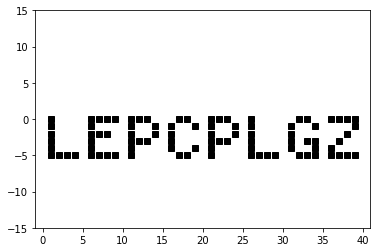

In [93]:
fig, ax = plt.subplots()
for (x, y), val in paint(start=1).items():
    if val == 1:
        ax.plot(x, y, 'ks')
ax.set_ylim(-15, 15)

## Part 12: The N-Body Problem

In [94]:
import copy
import numpy as np

class Moon:
    def __init__(self, x, y, z, vel=None):
        self.pos = np.array([x, y, z])
        if vel is None:
            vel = (0, 0, 0)
        self.vel = np.array(vel)

    @classmethod
    def fromstring(cls, s):
        parts = s.strip().split(',')
        return cls(int(parts[0].split('=')[-1]),
                   int(parts[1].split('=')[-1]),
                   int(parts[2].split('=')[-1][:-1]))

    def __str__(self):
        return (f'pos=<x={self.pos[0]}, y={self.pos[1]}, z={self.pos[2]}>, ' +
                f'vel=<x={self.vel[0]}, y={self.vel[1]}, z={self.vel[2]}>')

    def __repr__(self):
        return f'{type(self).__name__}({self.pos[0]}, {self.pos[1]}, {self.pos[2]})'

    def gravity(self, other):
        diff = other.pos - self.pos
        self.vel += np.sign(diff)
        other.vel -= np.sign(diff)

    def move(self):
        self.pos += self.vel

    def __eq__(self, other):
        return (self.pos == other.pos).all() and (self.vel == other.vel).all()

    @property
    def total_energy(self):
        return self.potential_energy * self.kinetic_energy

    @property
    def potential_energy(self):
        return np.abs(self.pos).sum()

    @property
    def kinetic_energy(self):
        return np.abs(self.vel).sum()

    def __copy__(self):
        return type(self)(*self.pos, np.array(self.vel))

def parse(fobj):
    for line in fobj:
        yield Moon.fromstring(line)

def run(moons, n):
    for i in range(n):
        _step(moons)

def run_to_repeat(moons):
    orig_moons = copy.deepcopy(moons)
    steps = [0] * 3
    cycled = [False] * 3
    while not all(cycled):
        _step(moons)
        for ind, status in enumerate(cycled):
            if not status:
                steps[ind] += 1
                if all(moon.pos[ind] == orig.pos[ind] and moon.vel[ind] == 0 for orig, moon in zip(orig_moons, moons)):
                    cycled[ind] = True
    return steps

def find_cycle_count(moons):
    xc, yc, zc = run_to_repeat(moons)
    tmp = (xc * yc) // gcd(xc, yc)
    return (tmp * zc) // gcd(tmp, zc)

def _step(moons):
    for m1, m2 in itertools.combinations(moons, 2):
        m1.gravity(m2)

    for m in moons:
        m.move()

In [95]:
moons = list(parse(StringIO('''<x=-1, y=0, z=2>
<x=2, y=-10, z=-7>
<x=4, y=-8, z=8>
<x=3, y=5, z=-1>''')))
run(moons, 10)

assert moons[0] == Moon(2, 1, -3, (-3, -2, 1))
assert moons[1] == Moon(1, -8, 0, (-1, 1, 3))
assert moons[2] == Moon(3, -6, 1, (3, 2, -3))
assert moons[3] == Moon(2, 0, 4, (1, -1, -1))
assert sum(m.total_energy for m in moons) == 179

In [96]:
moons = list(parse(StringIO('''<x=-8, y=-10, z=0>
<x=5, y=5, z=10>
<x=2, y=-7, z=3>
<x=9, y=-8, z=-3>''')))
run(moons, 100)

assert moons[0] == Moon(8, -12, -9, (-7, 3, 0))
assert moons[1] == Moon(13, 16, -3, (3, -11, -5))
assert moons[2] == Moon(-29, -11, -1, (-3, 7, 4))
assert moons[3] == Moon(16, -13, 23, (7, 1, 1))
assert sum(m.total_energy for m in moons) == 1940

In [97]:
with open('input12.txt', 'rt') as infile:
    moons = list(parse(infile))
run(moons, 1000)
print('Part 1:', sum(m.total_energy for m in moons))

Part 1: 9127


In [98]:
moons = list(parse(StringIO('''<x=-1, y=0, z=2>
<x=2, y=-10, z=-7>
<x=4, y=-8, z=8>
<x=3, y=5, z=-1>''')))
assert find_cycle_count(moons) == 2772

In [99]:
moons = list(parse(StringIO('''<x=-8, y=-10, z=0>
<x=5, y=5, z=10>
<x=2, y=-7, z=3>
<x=9, y=-8, z=-3>''')))
assert find_cycle_count(moons) == 4686774924

In [100]:
with open('input12.txt', 'rt') as infile:
    moons = list(parse(infile))
print('Part 2:', find_cycle_count(moons))

Part 2: 353620566035124


## Day 13: Care Package

In [101]:
from intcode import Computer
c = Computer.fromfile('input13.txt')
c.run()

print('Part 1:', sum(1 for *_, t in chunk_iter(c.output, 3) if t == 2))

Part 1: 268


In [102]:
c = Computer.fromfile('input13.txt')

# Insert 2 quarters
c.memory[0] = 2

board = np.zeros((42, 26))
score = 0
ball_x = 0
paddle_x = 0
while c.running:
    c.run([np.sign(ball_x - paddle_x)])
    for x, y, t in chunk_iter(c.output, 3):
        if x == -1 and y == 0:
            score = t
        else:
            board[x, y] = t
            if t == 3:
                paddle_x = x
            elif t == 4: 
                ball_x = x
    # Clear the output back out
    c.output = []

Part 2: 13989


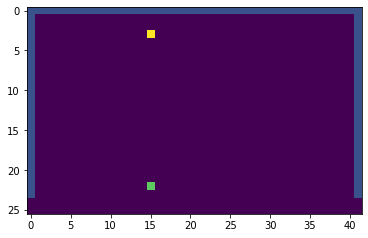

In [103]:
import matplotlib.pyplot as plt
plt.imshow(board.T, origin='upper')
print('Part 2:', score)

## Day 14: Space Stoichiometry

In [104]:
from collections import Counter

class Creator:
    def __init__(self, recipes):
        self.recipes = recipes
        self.inventory = Counter()

    @classmethod
    def fromfile(cls, fobj):
        recipes = {}
        for line in fobj:
            ingred, output = line.strip().split(' => ')
            out_count, out = output.split()
            inp = [((parts := i.split())[1], int(parts[0])) for i in ingred.split(', ')]
            recipes[out] = [int(out_count)] + inp
        return cls(recipes)

    def make(self, item, count):
        ore_count = 0

        prod_count, *ingreds = self.recipes[item]
        mult = count // prod_count + (count % prod_count > 0)

        for ingred, num in ingreds:
            if ingred == 'ORE':
                ore_count += mult * num
            else:
                if self.inventory[ingred] < mult * num:
                    ore_count += self.make(ingred, mult * num - self.inventory[ingred])
                self.inventory[ingred] -= mult * num

        self.inventory[item] += mult * prod_count
        
        return ore_count

    def max_for_ore(self, item, limit=1000000000000):
        lower = 1
        upper = limit
        guess = limit // c.make(item, 1) * 2
        while upper - lower > 1:
#            print(lower, upper, guess)
            ore = c.make(item, guess)
            if ore > limit:
                upper = guess
            elif ore < limit:
                lower = guess
            else:
                return guess
            guess = (lower + upper) // 2
        return lower

In [105]:
c = Creator.fromfile(StringIO("""10 ORE => 10 A
1 ORE => 1 B
7 A, 1 B => 1 C
7 A, 1 C => 1 D
7 A, 1 D => 1 E
7 A, 1 E => 1 FUEL"""))
assert c.make('FUEL', 1) == 31

In [106]:
c = Creator.fromfile(StringIO("""9 ORE => 2 A
8 ORE => 3 B
7 ORE => 5 C
3 A, 4 B => 1 AB
5 B, 7 C => 1 BC
4 C, 1 A => 1 CA
2 AB, 3 BC, 4 CA => 1 FUEL"""))
assert c.make('FUEL', 1) == 165

In [107]:
c = Creator.fromfile(StringIO("""157 ORE => 5 NZVS
165 ORE => 6 DCFZ
44 XJWVT, 5 KHKGT, 1 QDVJ, 29 NZVS, 9 GPVTF, 48 HKGWZ => 1 FUEL
12 HKGWZ, 1 GPVTF, 8 PSHF => 9 QDVJ
179 ORE => 7 PSHF
177 ORE => 5 HKGWZ
7 DCFZ, 7 PSHF => 2 XJWVT
165 ORE => 2 GPVTF
3 DCFZ, 7 NZVS, 5 HKGWZ, 10 PSHF => 8 KHKGT"""))
assert c.make('FUEL', 1) == 13312
assert c.max_for_ore('FUEL') == 82892753

In [108]:
c = Creator.fromfile(StringIO("""2 VPVL, 7 FWMGM, 2 CXFTF, 11 MNCFX => 1 STKFG
17 NVRVD, 3 JNWZP => 8 VPVL
53 STKFG, 6 MNCFX, 46 VJHF, 81 HVMC, 68 CXFTF, 25 GNMV => 1 FUEL
22 VJHF, 37 MNCFX => 5 FWMGM
139 ORE => 4 NVRVD
144 ORE => 7 JNWZP
5 MNCFX, 7 RFSQX, 2 FWMGM, 2 VPVL, 19 CXFTF => 3 HVMC
5 VJHF, 7 MNCFX, 9 VPVL, 37 CXFTF => 6 GNMV
145 ORE => 6 MNCFX
1 NVRVD => 8 CXFTF
1 VJHF, 6 MNCFX => 4 RFSQX
176 ORE => 6 VJHF"""))
assert c.make('FUEL', 1) == 180697
assert c.max_for_ore('FUEL') == 5586022

In [109]:
c = Creator.fromfile(StringIO("""171 ORE => 8 CNZTR
7 ZLQW, 3 BMBT, 9 XCVML, 26 XMNCP, 1 WPTQ, 2 MZWV, 1 RJRHP => 4 PLWSL
114 ORE => 4 BHXH
14 VRPVC => 6 BMBT
6 BHXH, 18 KTJDG, 12 WPTQ, 7 PLWSL, 31 FHTLT, 37 ZDVW => 1 FUEL
6 WPTQ, 2 BMBT, 8 ZLQW, 18 KTJDG, 1 XMNCP, 6 MZWV, 1 RJRHP => 6 FHTLT
15 XDBXC, 2 LTCX, 1 VRPVC => 6 ZLQW
13 WPTQ, 10 LTCX, 3 RJRHP, 14 XMNCP, 2 MZWV, 1 ZLQW => 1 ZDVW
5 BMBT => 4 WPTQ
189 ORE => 9 KTJDG
1 MZWV, 17 XDBXC, 3 XCVML => 2 XMNCP
12 VRPVC, 27 CNZTR => 2 XDBXC
15 KTJDG, 12 BHXH => 5 XCVML
3 BHXH, 2 VRPVC => 7 MZWV
121 ORE => 7 VRPVC
7 XCVML => 6 RJRHP
5 BHXH, 4 VRPVC => 5 LTCX"""))
assert c.make('FUEL', 1) == 2210736
assert c.max_for_ore('FUEL') == 460664

In [110]:
with open('input14.txt', 'rt') as infile:
    c = Creator.fromfile(infile)
    print('Part 1:', c.make('FUEL', 1))

Part 1: 720484


In [111]:
print('Part 2:', c.max_for_ore('FUEL'))

Part 2: 1993284


## Day 15: Oxygen System

In [112]:
c = Computer.fromfile('input15.txt')

NORTH = 1
SOUTH = 2
WEST = 3
EAST = 4
direc_order = [NORTH, EAST, SOUTH, WEST]
direc_step = {NORTH:Point(0, 1), EAST:Point(1, 0), SOUTH:Point(0, -1), WEST:Point(-1, 0)}

BLOCKED = 0
OK = 1
END = 2

move = NORTH
loc = start = Point(22, 20)
direc = 0
layout = np.full((43, 43), 3, dtype=np.int8)
layout[tuple(start)] = 2
move_count = 0
while c.running:
    c.run([move])
    status = c.output.pop()
    
    step = direc_step[move]
    next_loc = loc + step
    if next_loc == start:
        break
    layout[tuple(next_loc)] = status

    if status == BLOCKED:
        # Turn left
        direc = (direc - 1) % 4
        move = direc_order[direc]
    elif status in (OK, END):
        # Turn right--essentially constantly tests wall on right
        move_count += 1
        loc = next_loc
        direc = (direc + 1) % 4
        move = direc_order[direc]
        if status == END:
            goal = next_loc

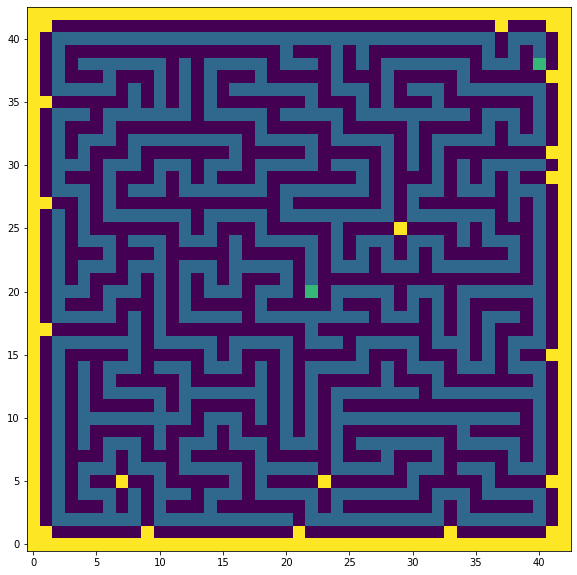

In [113]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(layout.T, origin='lower')

In [114]:
import heapq

class Node:
    def __init__(self, cost, estimate, loc, parent):
        self.cost = cost
        self.estimate = estimate
        self.loc = loc
        self.parent = parent

    @property
    def total_cost(self):
        return self.cost + self.estimate

    def __lt__(self, other):
        return self.total_cost < other.total_cost

def astar(start, goal, board):
    fringe = [Node(0, start.manhattan_distance(goal), start, None)]
    done = set()
    while fringe:
        best = heapq.heappop(fringe)
        if best.loc == goal:
            break
        done.add(best.loc)
        for candidate in best.loc.neighbors:
            if board[tuple(candidate)] and candidate not in done:
                heapq.heappush(fringe, Node(best.cost + 1, candidate.manhattan_distance(goal), candidate, best))
    else:
        raise RuntimeError('Failed to find end!')

    return best

In [115]:
path = astar(start, goal, layout)
print('Part 1:', path.cost)

Part 1: 216


In [116]:
def fill(start, layout):
    time = -1
    filled = set()
    to_fill = {start}
    while to_fill:
        time += 1
        next_round = set()
        for item in to_fill:
            for candidate in item.neighbors:
                if layout[tuple(candidate)] and candidate not in filled:
                    next_round.add(candidate)
        filled |= to_fill
        to_fill = next_round
    return time

In [117]:
test = np.array([[3, 0, 0, 3, 3, 3],
                 [0, 1, 1, 0, 0, 3],
                 [0, 1, 0, 1, 1, 0],
                 [0, 1, 2, 1, 0, 3],
                 [3, 0, 0, 0, 3, 3]])
src = Point(2, 3)

assert fill(src, test.T) == 4

In [118]:
print('Part 2:', fill(goal, layout))

Part 2: 326


## Day 16: Flawed Frequency Transmission

In [119]:
import itertools

def offset_fft(digits):
    out = [digits[-1]]
    for i in range(2, len(digits) + 1):
        out.append(out[-1] + digits[-i])
    return [abs(i) % 10 for i in reversed(out)]

def phases_off(digits, n, off):
    digits = digits[off:]
    for _ in range(n):
        digits = offset_fft(digits)
    return digits

def fft(digits):
    out = []
    half = len(digits) // 2
    for i in range(1, half + 1):
        repeat = itertools.cycle(itertools.chain(itertools.repeat(0, i),
                                                 itertools.repeat(1, i), 
                                                 itertools.repeat(0, i),
                                                 itertools.repeat(-1, i)))
        next(repeat)
        out.append(abs(sum(i * d for i, d in zip(repeat, digits))) % 10)
    out.extend(offset_fft(digits[half:]))
    return out

def phases(digits, n):
    for _ in range(n):
        digits = fft(digits)
    return digits

def decode(digits):
    offset = int(''.join(str(i) for i in digits[:7]))
    return phases_off(digits * 10000, 100, offset)[:8]

In [120]:
assert phases([1,2,3,4,5,6,7,8], 1) == [4,8,2,2,6,1,5,8]
assert phases([1,2,3,4,5,6,7,8], 2) == [3,4,0,4,0,4,3,8]
assert phases([1,2,3,4,5,6,7,8], 3) == [0,3,4,1,5,5,1,8]
assert phases([1,2,3,4,5,6,7,8], 4) == [0,1,0,2,9,4,9,8]

In [121]:
assert phases([8,0,8,7,1,2,2,4,5,8,5,9,1,4,5,4,6,6,1,9,0,8,3,2,1,8,6,4,5,5,9,5], 100)[:8] == [2,4,1,7,6,1,7,6]

In [122]:
assert phases([1,9,6,1,7,8,0,4,2,0,7,2,0,2,2,0,9,1,4,4,9,1,6,0,4,4,1,8,9,9,1,7], 100)[:8] == [7,3,7,4,5,4,1,8]

In [123]:
with open('input16.txt', 'rt') as infile:
    val = [int(i) for i in infile.read().strip()]

In [124]:
print('Part 1:', ''.join(str(i) for i in phases(val, 100)[:8]))

Part 1: 78009100


In [125]:
assert decode([0,3,0,3,6,7,3,2,5,7,7,2,1,2,9,4,4,0,6,3,4,9,1,5,6,5,4,7,4,6,6,4]) == [8,4,4,6,2,0,2,6]

In [126]:
assert decode([0,2,9,3,5,1,0,9,6,9,9,9,4,0,8,0,7,4,0,7,5,8,5,4,4,7,0,3,4,3,2,3]) == [7,8,7,2,5,2,7,0]

In [127]:
assert decode([0,3,0,8,1,7,7,0,8,8,4,9,2,1,9,5,9,7,3,1,1,6,5,4,4,6,8,5,0,5,1,7]) == [5,3,5,5,3,7,3,1]

In [128]:
print('Part 2:', ''.join(str(i) for i in decode(val)))

Part 2: 37717791


## Day 17: Set and Forget

In [129]:
def parse_output(out):
    layout = [[]]
    for i in out:
        char = chr(i)
        if char == '\n':
            layout.append([])
        else:
            layout[-1].append(char)
            if char in '<^>V':
                robot = (len(layout[-1]) - 1, len(layout) - 1, char)
    while not layout[-1]:
        layout.pop()
    return layout, robot

def print_board(board):
    print('\n'.join([''.join(c for c in row) for row in board]))

In [130]:
c = Computer.fromfile('input17.txt')
c.run()
layout, robot = parse_output(c.output)
print_board(layout)

..............###########......................
..............#.........#......................
..............#.........#.........#######......
..............#.........#.........#.....#......
..............#.........#.........#.....#......
..............#.........#.........#.....#......
..............#.........#.........#.....#......
..............#.........#.........#.....#......
..............#.........###########.....#......
..............#.........................#......
..............###########...............#######
........................#.....................#
....................#######...................#
....................#...#.#...................#
....................#...#.#...................#
....................#...#.#...................#
....................#...#.#...........#########
....................#...#.#...........#........
..................^##########.........#........
....................#...#.#.#.........#........
....................#...#######.......#.

In [131]:
v = sum(r * c for r in range(1, len(layout) - 1)
              for c in range(1, len(layout[0]) - 1)
              if {layout[r][c], layout[r + 1][c], layout[r - 1][c], layout[r][c - 1], layout[r][c + 1]} == {'#'})

print('Part 1:', v)

Part 1: 5620


In [132]:
def valid_index(layout, point):
    return point.y >= 0 and point.y < len(layout) and point.x >=0 and point.x < len(layout[0]) 

direcs = {'>':Vector(1, 0, 0), '<':Vector(-1, 0, 0), '^':Vector(0, -1, 0), 'V':Vector(0, 1, 0)}
scaffold = '#'

cur_loc = Point(*robot[:2])
cur_dir = direcs[robot[-1]]
cur_run = 0
moves = []
while True:
    #print(cur_loc, cur_dir)
    next_loc = cur_loc + cur_dir
    if valid_index(layout, next_loc) and layout[next_loc.y][next_loc.x] == scaffold:
        cur_loc = next_loc
        cur_run += 1
    else:
        if cur_run:
            moves.append(cur_run)
            cur_run = 0

        # All of the directions are kinda flipped from expected because we're in a coordinate system
        # where +y is down.
        if cur_dir.x == 1:
            left = cur_loc.down
            right = cur_loc.up
        elif cur_dir.x == -1:
            left = cur_loc.up
            right = cur_loc.down
        elif cur_dir.y == 1:
            left = cur_loc.right
            right = cur_loc.left
        elif cur_dir.y == -1:
            left = cur_loc.left
            right = cur_loc.right
        
        if valid_index(layout, left) and layout[left.y][left.x] == scaffold:
            moves.append('L')
            cur_dir = cur_dir.cross(Vector.k())
        elif valid_index(layout, right) and layout[right.y][right.x] == scaffold:
            moves.append('R')
            cur_dir = Vector.k().cross(cur_dir)
        else:
            break

move_str = ','.join(str(i) for i in moves)
move_str

'R,10,R,8,L,10,L,10,R,8,L,6,L,6,R,8,L,6,L,6,R,10,R,8,L,10,L,10,L,10,R,10,L,6,R,8,L,6,L,6,L,10,R,10,L,6,L,10,R,10,L,6,R,8,L,6,L,6,R,10,R,8,L,10,L,10'

In [133]:
sub_a = 'R,10,R,8,L,10,L,10'
sub_b = 'R,8,L,6,L,6'
sub_c = 'L,10,R,10,L,6'
main = move_str.replace(sub_a, 'A').replace(sub_b, 'B').replace(sub_c, 'C')

In [134]:
c = Computer.fromfile('input17.txt')
c.memory[0] = 2
c.run(main + '\n' + sub_a + '\n' + sub_b + '\n' + sub_c + '\nn\n')

In [135]:
c.display_ascii()

..............###########......................
..............#.........#......................
..............#.........#.........#######......
..............#.........#.........#.....#......
..............#.........#.........#.....#......
..............#.........#.........#.....#......
..............#.........#.........#.....#......
..............#.........#.........#.....#......
..............#.........###########.....#......
..............#.........................#......
..............###########...............#######
........................#.....................#
....................#######...................#
....................#...#.#...................#
....................#...#.#...................#
....................#...#.#...................#
....................#...#.#...........#########
....................#...#.#...........#........
..................^##########.........#........
....................#...#.#.#.........#........
....................#...#######.......#.

In [136]:
print('Part 2:', c.output[-1])

Part 2: 768115


## Day 18: Many-Worlds Interpretation

In [137]:
from collections import deque
from functools import lru_cache
import heapq

from geom import Point

class Maze:
    def __init__(self, layout):
        self.layout = layout
        self.all_keys = set(c for line in layout for c in line if c.islower())
        self.multi = False

    def get_location(self, item):
        for row, line in enumerate(self.layout):
            if (col:=line.find(item)) != -1:
                break
        else:
            raise RuntimeError(f'{item} not found!')
        return (col, row) 

    def set_multi_board(self):
        # Update board with new start:
        if self.multi:
            return
        start = Point(*self.get_location('@'))
        self.layout[start.y - 1] = self.layout[start.y - 1][:start.x - 1] + '@#@' + self.layout[start.y - 1][start.x + 2:]
        self.layout[start.y] = self.layout[start.y][:start.x - 1] + '###' + self.layout[start.y][start.x + 2:]
        self.layout[start.y + 1] = self.layout[start.y + 1][:start.x - 1] + '@#@' + self.layout[start.y + 1][start.x + 2:]
        self.multi = True

    def find_starts(self):
        locs = []
        for row, line in enumerate(self.layout):
            if (col:=line.find('@')) != -1:
                locs.append((col, row))
            if (col:=line.find('@', col + 1)) != -1:
                locs.append((col, row))
        return [(col, row) for col, row in locs]

    def reachable_keys(self, start, keys):
        frontier = deque([(*start, 0)])
        seen = set()
        d = [(1, 0), (-1, 0), (0, 1), (0, -1)]

        while frontier:
            x, y, dist = frontier.popleft()

            # Found a key
            if (key:=self.layout[y][x]).islower() and key not in keys:
                yield dist, (x, y), key
                continue

            for dx, dy in d:
                cx = x + dx
                cy = y + dy
                if (cx, cy) in seen:
                    continue
                else:
                    seen.add((cx, cy))

                loc_type = self.layout[cy][cx]

                # If it's a space, start, or a door we can pass
                if loc_type != '#' and (not loc_type.isupper() or loc_type.lower() in keys):
                    frontier.append((cx, cy, dist + 1))

    def find_dist(self):
        frontier = [(0, self.get_location('@'), frozenset())]
        seen = set()

        while frontier:
            dist, loc, keys = heapq.heappop(frontier)
            if keys == self.all_keys:
                break
            
            if (loc, keys) in seen:
                continue
            else:
                seen.add((loc, keys))

            for d, loc, key in self.reachable_keys(loc, keys):
                heapq.heappush(frontier, (dist + d, loc, keys | {key}))
        else:
            raise RuntimeError('Failed to find end!')

        return dist

    def find_dist_mult(self):
        starts = self.find_starts()
        frontier = [(0, tuple(starts), frozenset())]
        seen = [set() for _ in starts]

        while frontier:
            dist, rpos, keys = heapq.heappop(frontier)
            if keys == self.all_keys:
                break
            
            for i, loc in enumerate(rpos):
                if (loc, keys) in seen[i]:
                    continue
                else:
                    seen[i].add((loc, keys))
                
                for d, loc, key in self.reachable_keys(loc, keys):
                    new_rpos = rpos[:i] + (loc,) + rpos[i + 1:]
                    heapq.heappush(frontier, (dist + d, new_rpos, keys | {key}))
        else:
            raise RuntimeError('Failed to find end!')

        return dist

In [138]:
test_layout = ['#########',
               '#b.A.@.a#',
               '#########']
assert Maze(test_layout).find_dist() == 8

In [139]:
test_layout = ['########################',
               '#f.D.E.e.C.b.A.@.a.B.c.#',
               '######################.#',
               '#d.....................#',
               '########################']
assert Maze(test_layout).find_dist() == 86

In [140]:
test_layout = ['########################',
               '#...............b.C.D.f#',
               '#.######################',
               '#.....@.a.B.c.d.A.e.F.g#',
               '########################']
assert Maze(test_layout).find_dist() == 132

In [141]:
test_layout = ['#################',
               '#i.G..c...e..H.p#',
               '########.########',
               '#j.A..b...f..D.o#',
               '########@########',
               '#k.E..a...g..B.n#',
               '########.########',
               '#l.F..d...h..C.m#',
               '#################']
assert Maze(test_layout).find_dist() == 136

In [142]:
test_layout = ['########################',
               '#@..............ac.GI.b#',
               '###d#e#f################',
               '###A#B#C################',
               '###g#h#i################',
               '########################']
assert Maze(test_layout).find_dist() == 81

In [143]:
with open('input18.txt', 'rt') as infile:
    layout = infile.read().split('\n')

d = Maze(layout).find_dist()
print('Part 1:', d)

Part 1: 5102


In [144]:
test_layout = ['#######',
               '#a.#Cd#',
               '##@#@##',
               '#######',
               '##@#@##',
               '#cB#Ab#',
               '#######']
assert Maze(test_layout).find_dist_mult() == 8

In [145]:
test_layout = ['###############',
               '#d.ABC.#.....a#',
               '######@#@######',
               '###############',
               '######@#@######',
               '#b.....#.....c#',
               '###############']
assert Maze(test_layout).find_dist_mult() == 24

In [146]:
test_layout = ['#############',
               '#DcBa.#.GhKl#',
               '#.###@#@#I###',
               '#e#d#####j#k#',
               '###C#@#@###J#',
               '#fEbA.#.FgHi#',
               '#############']
assert Maze(test_layout).find_dist_mult() == 32

In [147]:
with open('input18.txt', 'rt') as infile:
    layout = infile.read().split('\n')

m = Maze(layout)
m.set_multi_board()
d = m.find_dist_mult()

print('Part 2:', d)

Part 2: 2282


## Day 19: Tractor Beam

In [148]:
from intcode import Computer, readcode

In [149]:
class CheckPoint:
    def __init__(self):
        self.prog = readcode('input19.txt')
        self.comp = Computer(self.prog)

    def __call__(self, inp):
        self.comp.reset(self.prog)
        self.comp.run(inp)
        return self.comp.output[0]

In [150]:
total = 0
cp = CheckPoint()
for x in range(50):
    for y in range(50):
        total += cp((x, y))

print('Part 1:', total)

Part 1: 150


In [151]:
from geom import Point, Vector

right = Vector(1, 0, 0)
down = Vector(0, 1, 0)

loc = Point(0, 0)
size = 100
right_edge = Vector(size - 1, 0, 0)
bottom_edge = Vector(0, size - 1, 0)

while not (cp(loc + right_edge) and cp (loc + bottom_edge)):
    while not cp(loc + bottom_edge):
        loc += right
    while not cp(loc + right_edge):
        loc += down
    
print(loc)

In [152]:
print('Part 2:', 10000 * loc.x + loc.y)

Part 2: 12201460


## Day 20: Donut Maze

In [153]:
import string

from algs import BreadthFirstSearch
from geom import Point

class Maze:
    PATH = '.'
        
    def __init__(self, fobj):
        self.maze = fobj.read().rstrip().split('\n')

        labels = self._get_labels()
        self.start = labels.pop('AA')[0]
        self.end = labels.pop('ZZ')[0]
        self.portals = {}
        for p1, p2 in labels.values():
            self.portals[p1] = p2
            self.portals[p2] = p1

    def _get_labels(self):
        labels = {}
        for y, line in enumerate(self.maze):
            for x, c in enumerate(line):
                if c in string.ascii_uppercase:
                    if loc := self._find_adjascent(x, y, self.PATH):
                        other_char = self.maze[2 * y - loc[1]][2 * x - loc[0]]
                        if loc > (x, y):
                            label = other_char + c
                        else:
                            label = c + other_char
                        labels.setdefault(label, []).append(loc)
        return labels

    def _find_adjascent(self, x, y, match):
        if y < len(self.maze) - 1 and self.maze[y + 1][x] in match:
            return (x, y + 1)
        elif y > 0 and self.maze[y - 1][x] in match:
            return (x, y - 1)
        elif x < len(self.maze[y]) - 1 and self.maze[y][x + 1] in match:
            return (x + 1, y)
        elif x > 0 and self.maze[y][x - 1] in match:
            return (x - 1, y)

        return None

    def find_path(self):
        bfs = BreadthFirstSearch(self.start)
        for loc in bfs:
            if loc == self.end:
                break

            if loc in self.portals:
                bfs.add(self.portals[loc])

            for candidate in Point(*loc).neighbors:
                if self.maze[candidate.y][candidate.x] == self.PATH:
                    bfs.add(tuple(candidate))
        else:
            raise RuntimeError('Failed to find end!')

        return bfs.order()

In [154]:
with open('input20.txt', 'rt') as infile:
    m = Maze(infile)

In [155]:
p = m.find_path()
print('Part 1:', len(p) - 1)

Part 1: 696


In [156]:
class DonutMaze(Maze):
    PATH = '.'
        
    def __init__(self, fobj):
        self.maze = fobj.read().rstrip().split('\n')
        labels = self._get_labels()
        self.start = labels.pop('AA')[0]
        self.end = labels.pop('ZZ')[0]

        self.inner = {}
        self.outer = {}
        for p1, p2 in labels.values():
            if p1[0] == 2 or p1[0] == len(self.maze[0]) - 3 or p1[1] == 2 or p1[1] == len(self.maze) - 3:
                self.outer[p1] = p2
                self.inner[p2] = p1
            else:
                self.inner[p1] = p2
                self.outer[p2] = p1

    def find_path(self):
        bfs = BreadthFirstSearch((self.start, 0))
        for loc, depth in bfs:
            if loc == self.end and depth == 0:
                break

            if loc in self.outer and depth > 0:
                bfs.add((self.outer[loc], depth - 1))
            elif loc in self.inner:
                bfs.add((self.inner[loc], depth + 1))

            for candidate in Point(*loc).neighbors:
                if self.maze[candidate.y][candidate.x] == self.PATH:
                    bfs.add((tuple(candidate), depth))
        else:
            raise RuntimeError('Failed to find end!')

        return bfs.order()

In [157]:
with open('input20.txt', 'rt') as infile:
    dm = DonutMaze(infile)

In [158]:
p = dm.find_path()
print('Part 2:', len(p) - 1)

Part 2: 7538


## Day 21: Springdroid Adventure

In [159]:
from intcode import Computer

In [160]:
script = """NOT A J
NOT B T
OR T J
NOT C T
OR T J
AND D J
WALK"""

In [161]:
c = Computer.fromfile('input21.txt')
c.run(script + '\n')
c.display_ascii()

Input instructions:

Walking...




In [162]:
print('Part 1:', c.output[-1])

Part 1: 19352864


In [163]:
script = """NOT J J
AND C J
AND B J
AND A J
NOT J J
OR H T
OR E T
AND D T
AND T J
RUN"""

In [164]:
c = Computer.fromfile('input21.txt')
c.run(script + '\n')
c.display_ascii()

Input instructions:

Running...




In [165]:
print('Part 2:', c.output[-1])

Part 2: 1142488337


## Day 22: Slam Shuffle

In [166]:
def shuffle(cards, cmds):
    cards = list(cards)
    for cmd in cmds:
        if cmd.startswith('cut'):
            _, n = cmd.split()
            n = int(n)
            cards = cards[n:] + cards[:n]
        elif cmd.strip() == 'deal into new stack':
            cards = cards[::-1]
        elif cmd.startswith('deal with increment'):
            *_, n = cmd.split()
            n = int(n)
            newcards = [-1] * len(cards)
            for i, c in enumerate(cards):
                newcards[(i * n) % len(cards)] = c
            cards = newcards
    return cards

In [167]:
assert shuffle(range(10), ['deal into new stack']) == [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [168]:
assert shuffle(range(10), ['cut 3']) == [3, 4, 5, 6, 7, 8, 9, 0, 1, 2]

In [169]:
assert shuffle(range(10), ['cut -4']) == [6, 7, 8, 9, 0, 1, 2, 3, 4, 5]

In [170]:
assert shuffle(range(10), ['deal with increment 3']) == [0, 7, 4, 1, 8, 5, 2, 9, 6, 3]

In [171]:
assert shuffle(range(10), ['deal with increment 7',
                           'deal into new stack',
                           'deal into new stack']) == [
    0, 3, 6, 9, 2, 5, 8, 1, 4, 7]

In [172]:
assert shuffle(range(10), ['cut 6', 'deal with increment 7',
                           'deal into new stack']) == [
    3, 0, 7, 4, 1, 8, 5, 2, 9, 6]

In [173]:
assert shuffle(range(10), ['deal with increment 7',
                           'deal with increment 9',
                           'cut -2',]) == [
    6, 3, 0, 7, 4, 1, 8, 5, 2, 9]

In [174]:
assert shuffle(range(10), ['deal into new stack',
                           'cut -2',
                           'deal with increment 7',
                           'cut 8',
                           'cut -4',
                           'deal with increment 7',
                           'cut 3',
                           'deal with increment 9',
                           'deal with increment 3',
                           'cut -1']) == [
    9, 2, 5, 8, 1, 4, 7, 0, 3, 6]

In [175]:
with open('input22.txt', 'rt') as infile:
    cards = shuffle(range(10007), list(infile))            
print('Part 1:', cards.index(2019))

Part 1: 5540


In [176]:
def inv_shuffle_funcs(l, cmds):
    for cmd in reversed(cmds):
        if cmd.startswith('cut'):
            n = int(cmd.split()[-1])
            yield lambda p, n=n, l=l: (p + n) % l
        elif cmd.strip() == 'deal into new stack':
            yield lambda p, l=l: (l - p - 1) % l
        elif cmd.startswith('deal with increment'):
            n = int(cmd.split()[-1])
#             yield lambda p, n=n, l=l: (p * pow(n, l - 2, l)) % l
            def lam(p, n=n, l=l):
                for m in range(l):
                    if not (p + m * l) % n:
                        return (p + m * l) // n
            yield lam

In [177]:
def inv_shuffle(pos, funcs):
    for f in funcs:
#         print(pos, end=' -> ')
        pos = f(pos)
#         print(pos)
    return pos

In [178]:
f = list(inv_shuffle_funcs(10, ['deal into new stack']))
assert inv_shuffle(0, f) == 9
assert inv_shuffle(2, f) == 7
assert inv_shuffle(7, f) == 2
assert inv_shuffle(9, f) == 0

In [179]:
f = list(inv_shuffle_funcs(10, ['cut 3']))
assert inv_shuffle(9, f) == 2
assert inv_shuffle(0, f) == 3

In [180]:
f = list(inv_shuffle_funcs(10, ['cut -4']))
assert inv_shuffle(0, f) == 6
assert inv_shuffle(4, f) == 0
assert inv_shuffle(9, f) == 5

In [181]:
f = list(inv_shuffle_funcs(10, ['deal with increment 3']))
assert inv_shuffle(0, f) == 0
assert inv_shuffle(4, f) == 8
assert inv_shuffle(2, f) == 4

In [182]:
f = list(inv_shuffle_funcs(10, ['deal with increment 9']))
assert inv_shuffle(0, f) == 0
assert inv_shuffle(9, f) == 1

In [183]:
f = list(inv_shuffle_funcs(10, ['deal into new stack',
                           'cut -2',
                           'deal with increment 7',
                           'cut 8',
                           'cut -4',
                           'deal with increment 7',
                           'cut 3',
                           'deal with increment 9',
                           'deal with increment 3',
                           'cut -1']))
assert inv_shuffle(7, f) == 0
assert inv_shuffle(9, f) == 6
assert inv_shuffle(3, f) == 8

In [184]:
l = 119315717514047
with open('input22.txt', 'rt') as infile:
    funcs = list(inv_shuffle_funcs(l, list(infile)))

In [185]:
x = 2020
y = inv_shuffle(x, funcs)
z = inv_shuffle(y, funcs)

In [186]:
a = ((y - z) * pow(x - y, l - 2, l)) % l
b = y - a * x

In [187]:
n = 101741582076661

In [188]:
v = (pow(a, n, l) * x + (pow(a, n, l) - 1) * pow(a - 1, l - 2, l) * b) % l
print('Part 2:', v)

Part 2: 6821410630991


## Day 23: Category Six

In [189]:
network = {i:Computer.fromfile('input23.txt') for i in range(50)}
for i, c in network.items():
    c.send_input([i])

NAT = 255
need_first = True

comps = itertools.cycle(network)
while True:
    addr = next(comps)
    comp = network[addr]
    comp.run([-1])

    while comp.output:
        addr = comp.output.pop(0)
        x = comp.output.pop(0)
        y = comp.output.pop(0)
        if addr == NAT:
            nat = x, y
        else:
            network[addr].send_input((x, y))

    if not any(c.input_data for c in network.values()):
        if need_first:
            print('Part 1:', nat[-1])
            need_first = False
        elif nat[-1] == last[-1]:
            break

        network[0].send_input(nat)
        last = nat

print('Part 2:', nat[-1])

Part 1: 14834
Part 2: 10215


In [190]:
class NAT:
    def __init__(self, network):
        self.network = network
        self.input_data = None
        self.need_first = True
        self.output = []
    
    def run(self, _):
        if not any(c.input_data for c in self.network.values() if c is not self):
            self.output = [0, *self.input_data]

            if self.need_first:
                print('Part 1:', self.output[-1])
                self.need_first = False
            elif self.input_data[-1] == self.last[-1]:
                print('Part 2:', self.input_data[-1])
                return True
            self.last = self.input_data
    
    def send_input(self, v):
        self.input_data = v

network = {}
network[255] = NAT(network)
for i in range(50):
    c = Computer.fromfile('input23.txt')
    network[i] = c
    c.send_input([i])

comps = itertools.cycle(network.values())
while comp:=next(comps):
    if comp.run([-1]):
        break
    while comp.output:
        y = comp.output.pop()
        x = comp.output.pop()
        addr = comp.output.pop()
        network[addr].send_input((x, y))

Part 1: 14834
Part 2: 10214


## Day 24: Planet of Discord

In [191]:
with open('input24.txt', 'rt') as inp:
    board = inp.read().strip().split('\n')

seq = set()
while True:
    if tuple(board) in seq:
        break
    seq.add(tuple(board))
    next_board = []
    for r, line in enumerate(board):
        row = []
        for c, char in enumerate(line):
            count = 0
            if r > 0 and board[r - 1][c] == '#':
                count += 1
            if r < len(board) - 1 and board[r + 1][c] == '#':
                count += 1
            if c > 0 and board[r][c - 1] == '#':
                count += 1
            if c < len(board[0]) - 1 and board[r][c + 1] == '#':
                count += 1

            if char == '#' and count != 1:
                char = '.'
            elif char == '.' and count in (1, 2):
                char = '#'
            row.append(char)

        next_board.append(''.join(row))
    board = next_board

print('Part 1:', sum(2**i for i, c in enumerate(''.join(board)) if c == '#'))

Part 1: 18400821


In [192]:
board = set()
with open('input24.txt', 'rt') as inp:
    for r, line in enumerate(inp):
        for c, char in enumerate(line.strip()):
            if char == '#':
                board.add((0, r, c))

size = len(line.strip())
middle = size // 2
half_above = middle - 1
half_below = middle + 1
min_depth = max_depth = 0

for minute in range(200):
    depths = [k[0] for k in board]
    min_depth = min(depths) - 1
    max_depth = max(depths) + 1
    next_board = set()
    for depth in range(min_depth, max_depth + 1):
        for r in range(size):
            for c in range(size):
                # Middle is no longer a space
                if r == middle and c == middle:
                    continue

                neighbors = []
                
                # Above
                if r == 0:
                    neighbors.append((depth - 1, half_above, middle))
                elif r == half_below and c == middle:
                    neighbors.extend((depth + 1, size - 1, i) for i in range(size))
                else:
                    neighbors.append((depth, r - 1, c))

                # Below
                if r == size - 1:
                    neighbors.append((depth - 1, half_below, middle))
                elif r == half_above and c == middle:
                    neighbors.extend((depth + 1, 0, i) for i in range(size))
                else:
                    neighbors.append((depth, r + 1, c))

                # Left
                if c == 0:
                    neighbors.append((depth - 1, middle, half_above))
                elif c == half_below and r == middle:
                    neighbors.extend((depth + 1, i, size - 1) for i in range(size))
                else:
                    neighbors.append((depth, r, c - 1))
                
                # Right
                if c == size - 1:
                    neighbors.append((depth - 1, middle, half_below))
                elif c == half_above and r == middle:
                    neighbors.extend((depth + 1, i, 0) for i in range(size))
                else:
                    neighbors.append((depth, r, c + 1))

                is_bug = (depth, r, c) in board
                bugs = sum(n in board for n in neighbors)

                if (is_bug and bugs == 1) or (not is_bug and bugs in (1, 2)):
                    next_board.add((depth, r, c))
        
    board = next_board

print('Part 2:', len(board))

Part 2: 1914


## Day 25: Cryostasis

In [193]:
def parse_screen(s):
    dirs = []
    items = []
    name = 'Inventory'
    for line in s.split('\n'):
        if line.startswith('=='):
            name = line.strip('==').strip()
        elif line == 'Doors here lead:':
            cur_list = dirs
            cur_list.clear()
        elif line == 'Items here:' or line == 'Items in your inventory:':
            cur_list = items
            cur_list.clear()
        elif line.startswith('-'):
            cur_list.append(line[2:])
    return name, dirs, items

In [194]:
def walk(c):
    options = {}
    path = ['none']
    opposite = {'east': 'west', 'west': 'east', 'north': 'south', 'south': 'north'}
    bad_items = {'escape pod', 'molten lava', 'photons', 'giant electromagnet', 'infinite loop'}
    move = ''
    while True:
        c.run(move + '\n' if move else None)
        name, dirs, items = parse_screen(c.ascii_output)
        c.clear_output()
        if name not in options:
            options[name] = sorted(dirs)[::-1]
        for item in items:
            if item not in bad_items:
                c.run(f'take {item}\n')
                if 'Command?' not in c.ascii_output:
                    c.display_ascii()
                    return
        if not any(options.values()) or name == 'Security Checkpoint':
            break

        cur_opts = options[name]
        for i, opt in enumerate(cur_opts):
            if opt != opposite.get(path[-1], None):
                break
        move = cur_opts.pop(i)
        if move != opposite.get(path[-1], None):
            path.append(move)
        else:
            path.pop()

In [195]:
def action(s):
    c.run(s + '\n')
    ret = parse_screen(c.ascii_output)
    c.clear_output()
    return ret

In [196]:
import itertools
def solve(c):
    _, _, all_items = action('inv')
    all_items = set(all_items)
    for item in all_items:
        action(f'drop {item}')

    too_much = []
    items = set()
    for i in range(1, len(all_items) + 1):
        for subset in itertools.combinations(all_items, i):
            subset = set(subset)
            for item in items - subset:
                action(f'drop {item}')
            for item in subset - items:
                action(f'take {item}')
            items = subset

            c.run('south\n')
            if 'Security Checkpoint' not in c.ascii_output:
                c.display_ascii()
                return
            elif i == 1 and 'lighter' in c.ascii_output:
                too_much.append(*subset)
            c.clear_output()

        if i == 1:
            all_items -= set(too_much)

In [197]:
from intcode import Computer
c = Computer.fromfile('input25.txt')
walk(c)
solve(c)




== Pressure-Sensitive Floor ==
Analyzing...

Doors here lead:
- north

A loud, robotic voice says "Analysis complete! You may proceed." and you enter the cockpit.
Santa notices your small droid, looks puzzled for a moment, realizes what has happened, and radios your ship directly.
"Oh, hello! You should be able to get in by typing 4206594 on the keypad at the main airlock."

CPU times: user 1.96 s, sys: 9.94 ms, total: 1.97 s
Wall time: 1.99 s
